Load the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset into a DataFrame
data = pd.read_csv('C:/Users/anagh/Documents/myProject/2023-amse-AnaghaTamhankar/data/zipcode_data.csv')

In [3]:
data.head()

,zipcode,LSA_Nr_count,violation_count,mean_distance
0,50667,48,10088,0.145546
1,50668,40,5915,0.141949
2,50670,43,5682,0.125344
3,50672,39,5453,0.100800
4,50674,50,6328,0.101850


##### Hypothesis 1: 
Null hypothesis (H0): There is no difference in the number of violations between zipcodes with different distances from the signal. 

Alternative hypothesis (Ha): There is a significant difference in the number of violations between areas with larger and shorter distances from the signal.

Data Exploration:

In [4]:
# Summary statistics
summary_stats = data[['violation_count', 'mean_distance']].describe()
print(summary_stats)


       violation_count  mean_distance
count        45.000000      45.000000
mean       3166.466667       0.276369
std        2689.958378       0.176630
min         562.000000       0.100800
25%        1132.000000       0.161359
50%        2108.000000       0.207236
75%        3956.000000       0.372450
max       10088.000000       0.944068


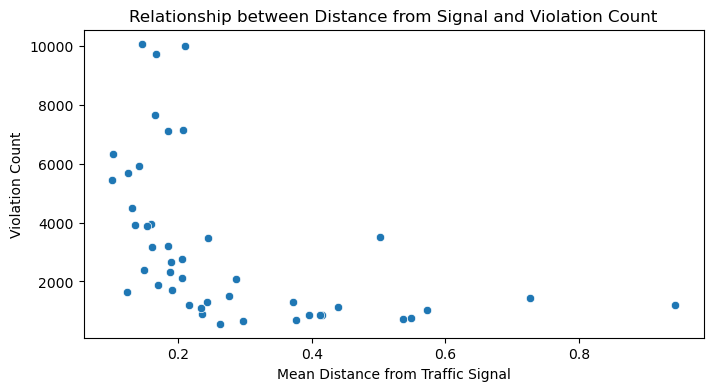

In [16]:
# Distance from signal vs. Violation count scatter plot
plt.figure(figsize=(8, 4))
sns.scatterplot(data=data, x='mean_distance', y='violation_count')
plt.xlabel('Mean Distance from Traffic Signal')
plt.ylabel('Violation Count')
plt.title('Relationship between Distance from Signal and Violation Count')
plt.show()


Find the correlation between violation count and mean distance of the violation from traffic signal in the zipcode 

In [6]:
data['violation_count'].corr(data['mean_distance'])

-0.4716320140645928

Grouping and Comparison:

In [7]:

larger_distance_group = data[data['mean_distance'] > data['mean_distance'].median()]
shorter_distance_group = data[data['mean_distance'] <= data['mean_distance'].median()]


mean_violations_larger_distance = larger_distance_group['violation_count'].mean()
mean_violations_shorter_distance = shorter_distance_group['violation_count'].mean()

print(f"Mean Violations (Larger Distance): {mean_violations_larger_distance}")
print(f"Mean Violations (Shorter Distance): {mean_violations_shorter_distance}")


Mean Violations (Larger Distance): 1690.8181818181818
Mean Violations (Shorter Distance): 4577.95652173913


Statistical Testing

In [8]:
from scipy.stats import ttest_ind

# Perform independent t-test
t_statistic, p_value = ttest_ind(larger_distance_group['violation_count'], shorter_distance_group['violation_count'])

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

T-Statistic: -4.235628718167968
P-Value: 0.00011791274803307264


In [9]:
alpha = 0.05  # Chosen significance level

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in the number of violations between areas with larger and shorter distances from the signal.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest a significant difference in the number of violations.")


Reject the null hypothesis.
There is a significant difference in the number of violations between areas with larger and shorter distances from the signal.


#######################################################################################################################################################

##### Hypothesis 2:
Null hypothesis (H0): There is no difference in the number of violations between zipcodes despite of signal count.

Alternative hypothesis (Ha): There is a significant difference in the number of violations between areas with more traffic signals vs less traffic signals.

Data Exploration:

In [10]:
# Summary statistics
summary_stats = data[['LSA_Nr_count', 'violation_count']].describe()
print(summary_stats)


       LSA_Nr_count  violation_count
count     45.000000        45.000000
mean      34.533333      3166.466667
std       13.458016      2689.958378
min        9.000000       562.000000
25%       25.000000      1132.000000
50%       33.000000      2108.000000
75%       43.000000      3956.000000
max       76.000000     10088.000000


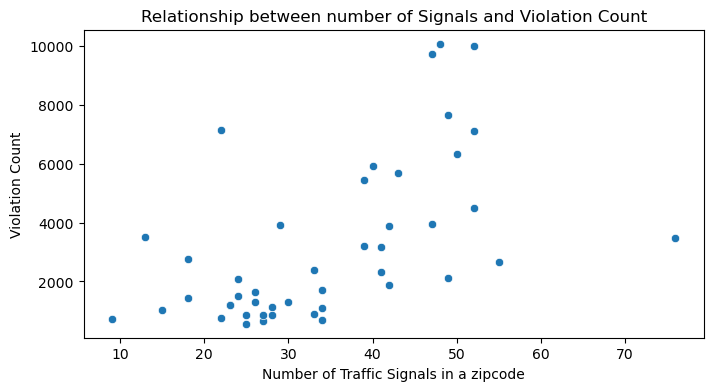

In [11]:
# Number of signals  vs. Violation count scatter plot
plt.figure(figsize=(8, 4))
sns.scatterplot(data=data, x='LSA_Nr_count', y='violation_count')
plt.xlabel('Number of Traffic Signals in a zipcode')
plt.ylabel('Violation Count')
plt.title('Relationship between number of Signals and Violation Count')
plt.show()

Find the correlation between violation count and number of traffic signals in the zipcode area

In [12]:
data['violation_count'].corr(data['LSA_Nr_count'])

0.5496217266781016

Grouping and Comparison

In [13]:
more_signal_group = data[data['LSA_Nr_count'] > data['LSA_Nr_count'].median()]
less_signal_group = data[data['LSA_Nr_count'] <=  data['LSA_Nr_count'].median()]


mean_violations_more_signals= more_signal_group['violation_count'].mean()
mean_violations_less_signal = less_signal_group['violation_count'].mean()

print(f"Mean Violations (More Signals): {mean_violations_more_signals}")
print(f"Mean Violations (Less Signals): {mean_violations_less_signal}")


Mean Violations (More Signals): 4669.545454545455
Mean Violations (Less Signals): 1728.7391304347825


In [14]:
# Perform independent t-test
t_statistic, p_value = ttest_ind(more_signal_group['violation_count'], less_signal_group['violation_count'])

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

T-Statistic: 4.348536518952554
P-Value: 8.264037986938899e-05


In [15]:
alpha = 0.05  # Chosen significance level

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in the number of violations between areas with more traffic signals vs less traffic signals.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest a significant difference in the number of violations.")


Reject the null hypothesis.
There is a significant difference in the number of violations between areas with more traffic signals vs less traffic signals.
